## 顯示每個欄位的資訊

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
%matplotlib inline
pd.set_option("display.max_columns",100) 
df = pd.read_csv("train.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 房價分佈

In [2]:
trace0 = go.Box(
    y=df.SalePrice
    #name = 'asd'
)
layout = go.Layout(
    title = "SalePrice",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
plotly.offline.iplot({'data': trace0, 'layout': layout})

## 找出有遺失值的欄位,並由大而小排列

In [3]:
total = df.isnull().sum().sort_values(ascending=False)
pd.set_option("display.max_rows",100) 
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [4]:
missing_data = pd.DataFrame(data=total.values, index=total.index, columns=['total'])
df = df.drop((missing_data[missing_data['total'] > 0]).index,axis=1)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

## 各個特徵與SalePrcie的相關性

In [5]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

## 相關性視覺化

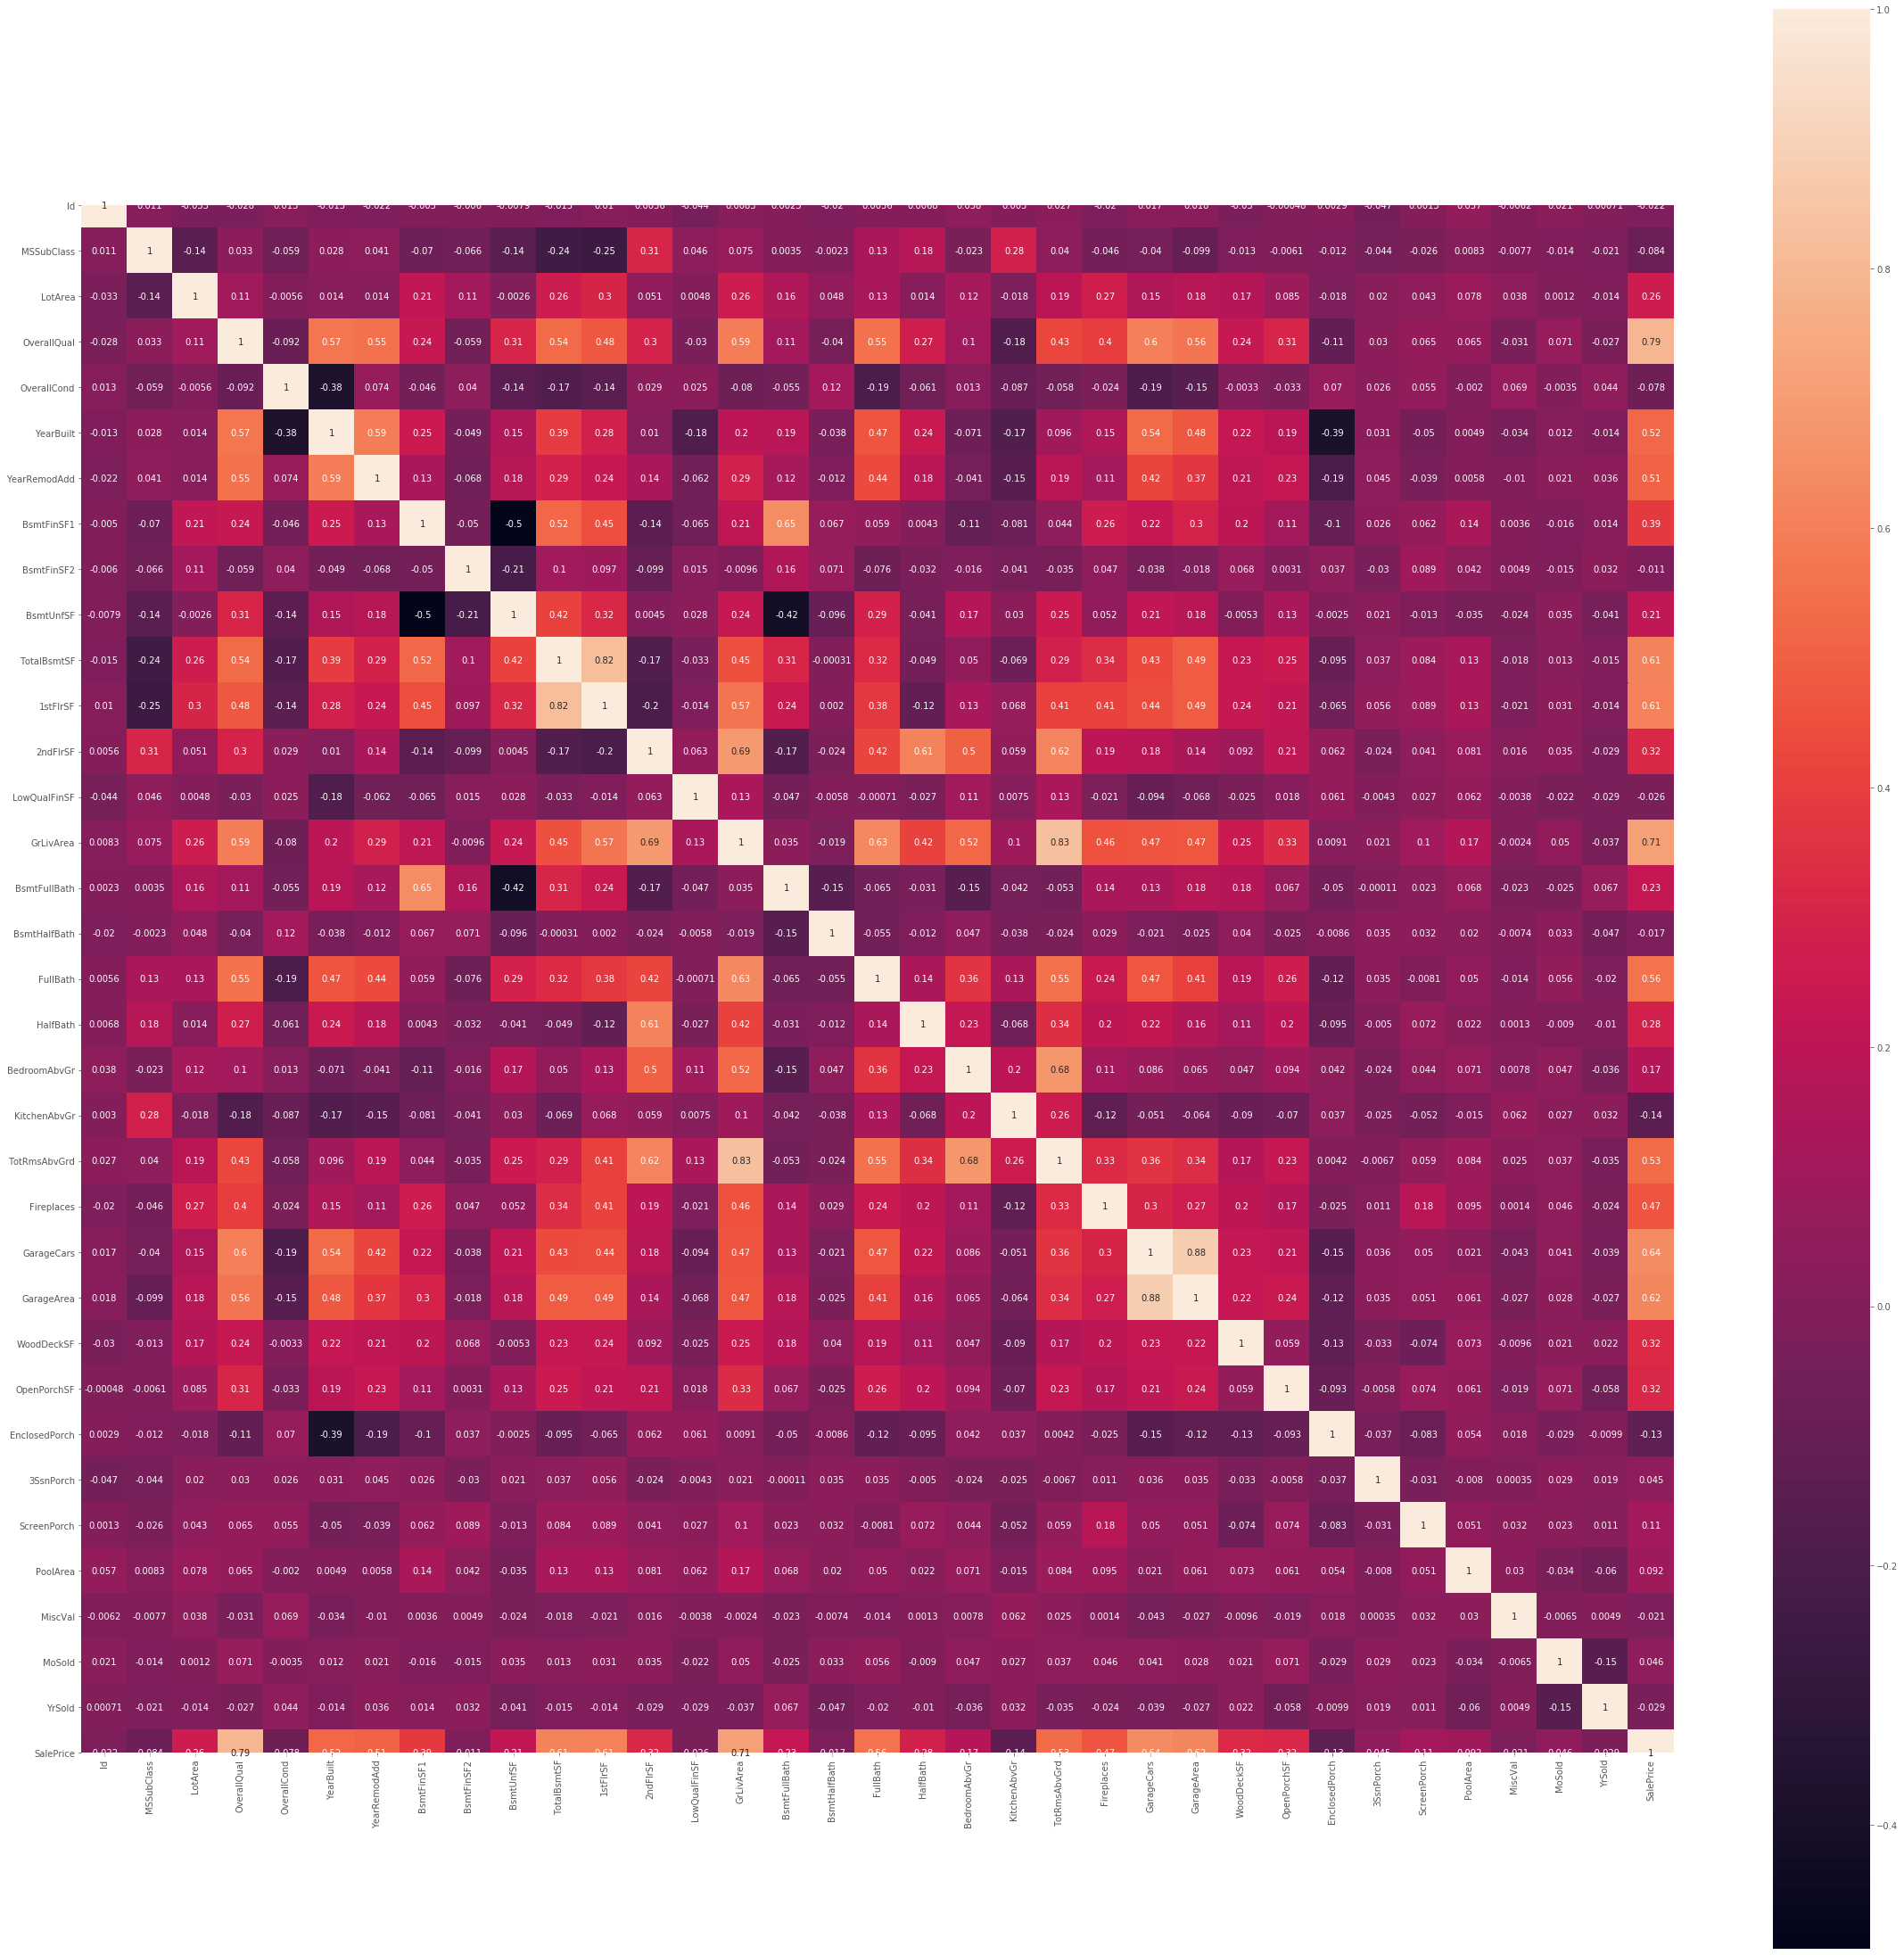

In [6]:
corre = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corre, square=True, annot=True)
plt.show()

## 檢查特徵的箱型圖,查看特徵的資料分布

array([345000, 385000, 438780, 383970, 372402, 412500, 501837, 475000,
       386250, 403000, 415298, 360000, 375000, 342643, 354000, 377426,
       437154, 394432, 426000, 555000, 440000, 380000, 374000, 430000,
       402861, 446261, 369900, 451950, 359100, 345000, 370878, 350000,
       402000, 423000, 372500, 392000, 755000, 361919, 341000, 538000,
       395000, 485000, 582933, 385000, 350000, 611657, 395192, 348000,
       556581, 424870, 625000, 392500, 745000, 367294, 465000, 378500,
       381000, 410000, 466500, 377500, 394617])

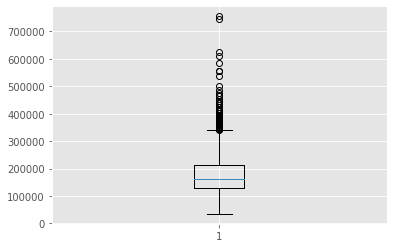

In [7]:
r = plt.boxplot(df['SalePrice'], showfliers=True)
r['fliers'][0].get_data()[1]

array([2945, 3222, 3608, 3112, 2794, 3493, 2978, 3228, 4676, 2775, 3194,
       3395, 4316, 3279, 3140, 2822, 2872, 2898, 3082, 2868, 2828, 3627,
       3086, 2872, 4476, 3447, 5642, 2810, 2792, 3238, 2784])

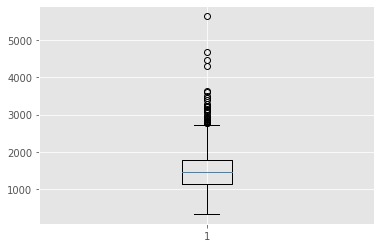

In [8]:
r = plt.boxplot(df['GrLivArea'], showfliers=True)
r['fliers'][0].get_data()[1]

array([11, 11, 12, 11, 11, 11, 11, 14, 11, 12, 11, 12, 11, 11, 12, 11, 12,
       11, 12, 11, 11, 12, 12, 11, 11, 12, 12, 12, 11, 11])

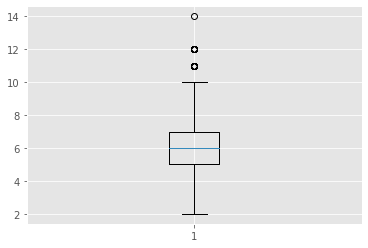

In [9]:
r = plt.boxplot(df['TotRmsAbvGrd'], showfliers=True)
r['fliers'][0].get_data()[1]

array([], dtype=int64)

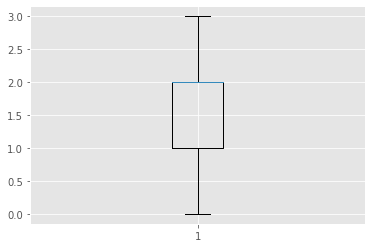

In [10]:
r = plt.boxplot(df['FullBath'], showfliers=True)
r['fliers'][0].get_data()[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 2223, 2216, 2392, 2121, 2136, 3206, 3094,
       2153, 3200, 3138, 2109, 2077, 2444, 2078, 2217, 2330, 2524, 2396,
       2158, 2136, 2076, 2110, 6110, 2633])

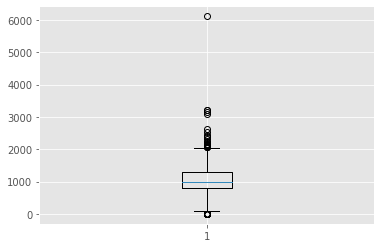

In [11]:
r = plt.boxplot(df['TotalBsmtSF'], showfliers=True)
r['fliers'][0].get_data()[1]

array([4, 4, 4, 4, 4])

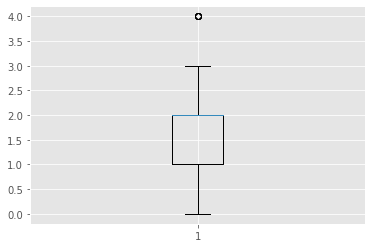

In [12]:
r = plt.boxplot(df['GarageCars'], showfliers=True)
r['fliers'][0].get_data()[1]

array([1, 1])

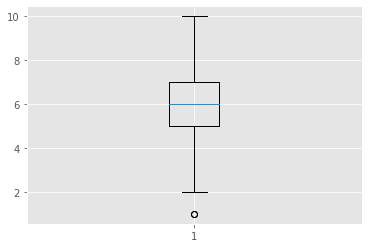

In [13]:
r = plt.boxplot(df['OverallQual'], showfliers=True)
r['fliers'][0].get_data()[1]

In [14]:
from sklearn.model_selection import train_test_split

X = df[['GrLivArea','TotRmsAbvGrd','FullBath','TotalBsmtSF','GarageCars','YearBuilt','OverallQual']]
y = df[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train

GrLivArea  TotRmsAbvGrd  FullBath  TotalBsmtSF  GarageCars  YearBuilt  \
1443        952             4         1          952           1       1916   
1227        912             5         1          912           2       1965   
181        1802             9         1          793           1       1920   
1273       1357             5         1         1019           1       1959   
1400       1158             5         1          862           1       1929   
...         ...           ...       ...          ...         ...        ...   
783        1110             4         1         1097           2       1978   
1212        672             4         1          672           1       1941   
194         864             5         1          864           1       1972   
342        1040             6         2            0           2       1949   
32         1234             7         2         1234           2       2007   

      OverallQual  
1443            6  
1227            5  
181             7  
1273            6  
1400            6  
...           ...  
783             5  
1212            4  
194             5  
342             3  
32              8  

[1022 rows x 7 columns]

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## 比較三種正規化演算法,模型評估

In [17]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

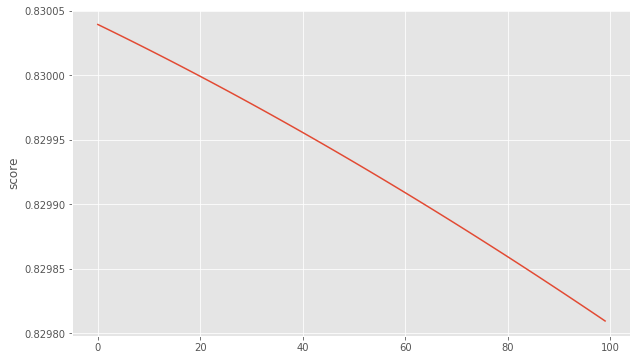

In [18]:
score_list_1=[]
for i in np.arange(0,10,.1):
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_std, y_train)
    score_list_1.append(ridge.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('score')
plt.plot(score_list_1)

/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 845166280035.0768, tolerance: 657737436.6283649



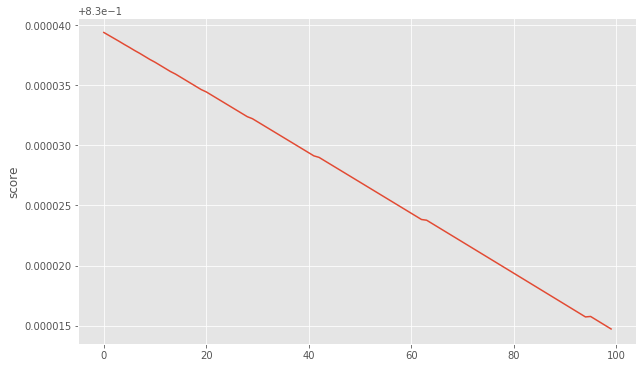

In [19]:
score_list_2=[]
for i in np.arange(0,10,.1):
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_std, y_train)
    score_list_2.append(lasso.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('score')
plt.plot(score_list_2)

/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 845166280035.0768, tolerance: 657737436.6283649



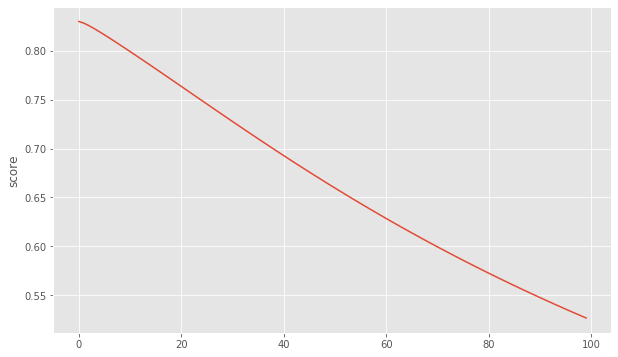

In [20]:
score_list_3=[]
for i in np.arange(0,10,.1):
    elastic = ElasticNet(alpha=i)
    elastic.fit(X_train_std, y_train)
    score_list_3.append(elastic.score(X_test_std, y_test))

plt.figure(figsize=(10,6))
plt.ylabel('score')
plt.plot(score_list_3)

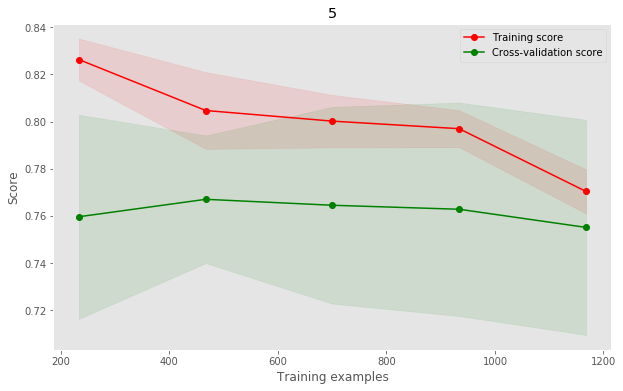

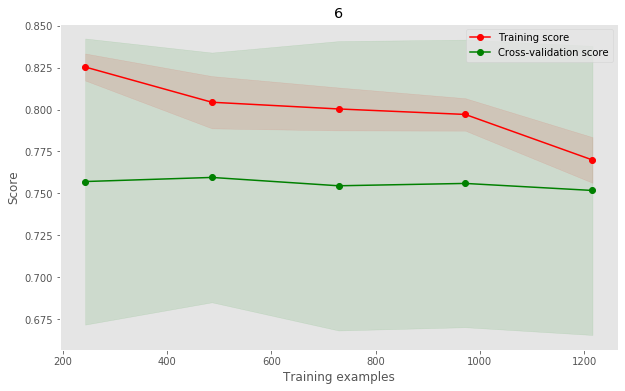

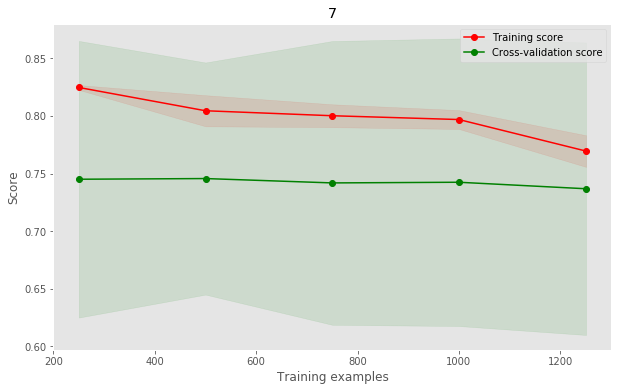

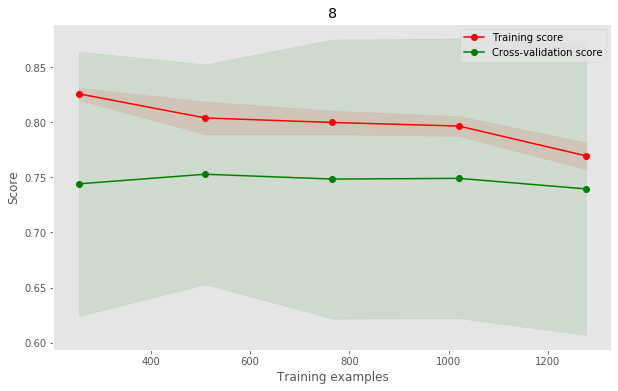

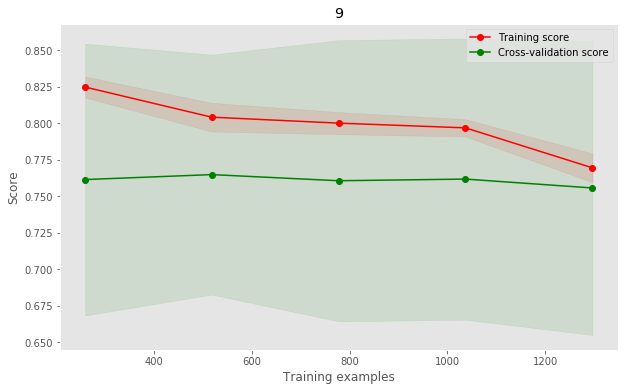

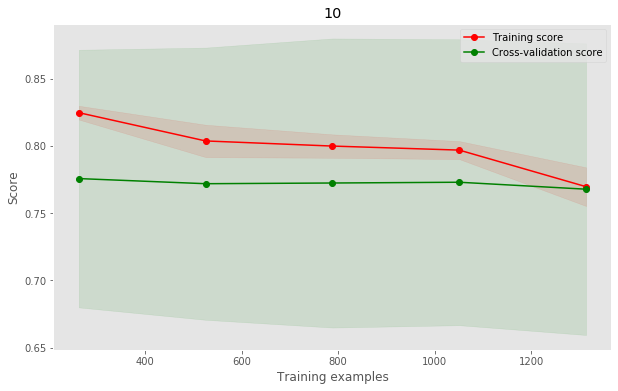

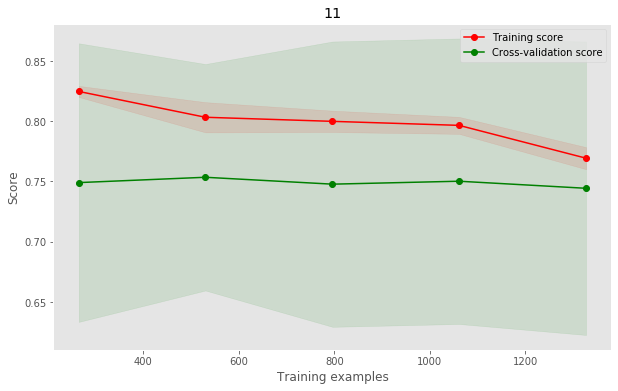

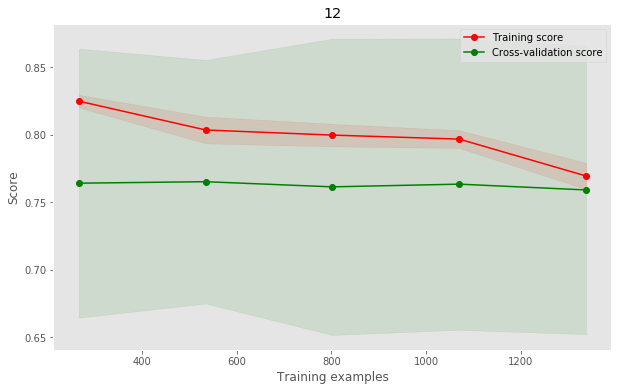

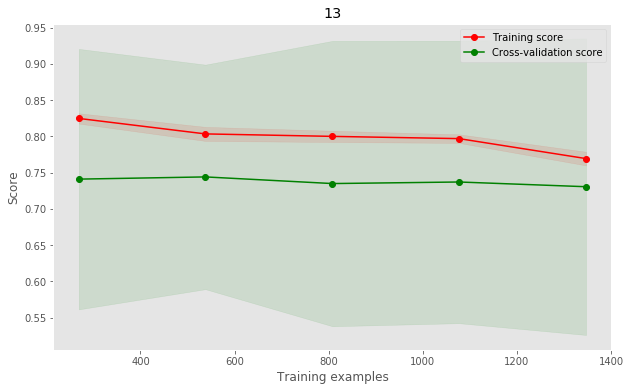

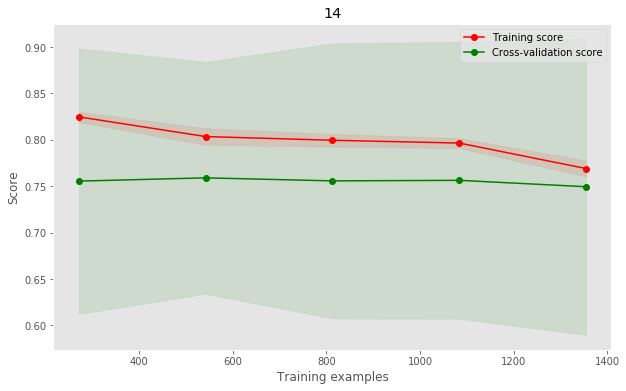

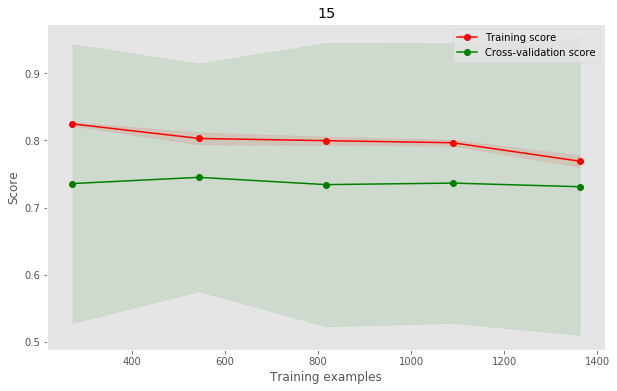

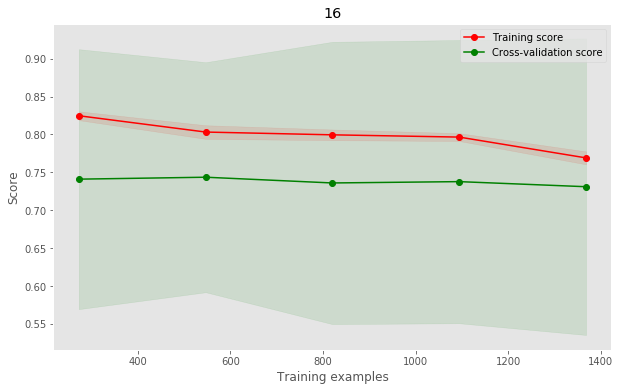

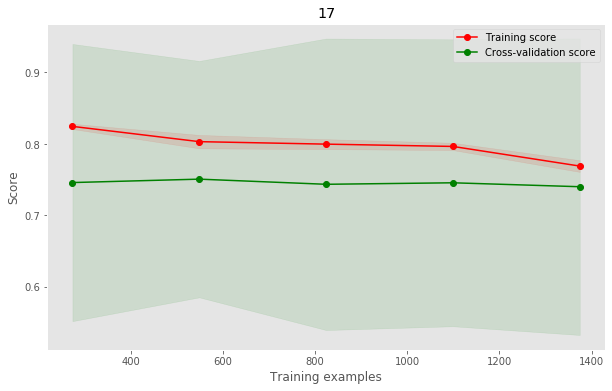

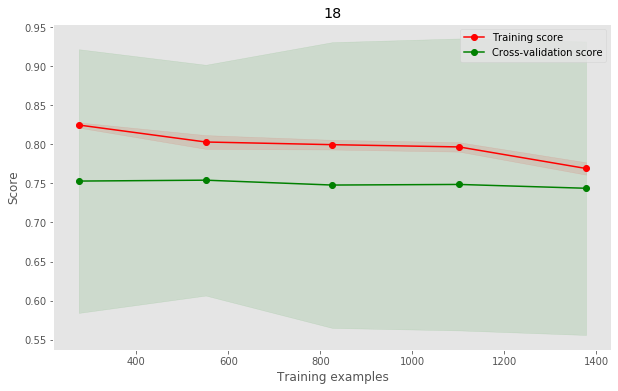

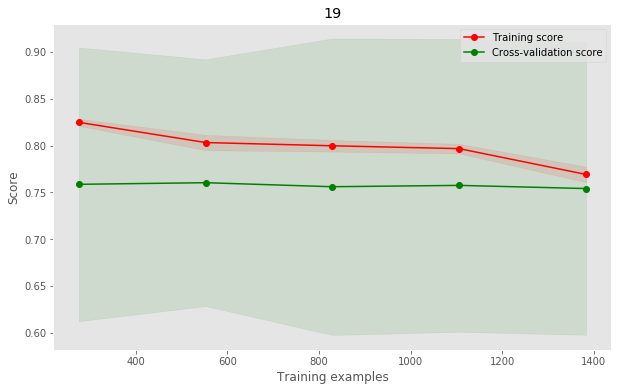

In [21]:
from sklearn.model_selection import KFold
for i in range(5,20):
    cv = KFold(n_splits=i, random_state=None, shuffle=True)
    estimator = Ridge(alpha=0.1)
    plot_learning_curve(estimator,i, X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## KNNRegressor

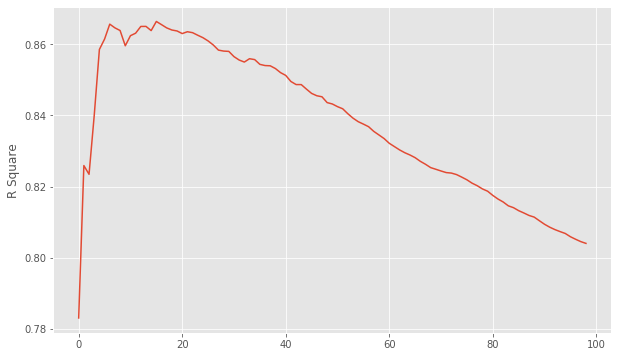

In [22]:
from sklearn.neighbors import KNeighborsRegressor

score_list=[]
for i in range(1,100):
    knnr = KNeighborsRegressor(n_neighbors=i,weights='distance')
    knnr.fit(X_train_std, y_train)
    score_list.append(knnr.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('R Square')
plt.plot(score_list)

## 迴歸樹

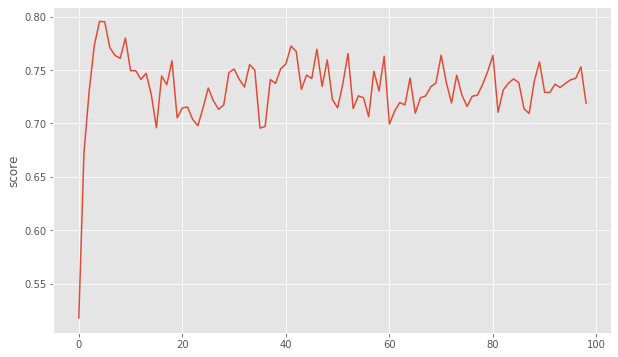

In [23]:
from sklearn.tree import DecisionTreeRegressor
score_list=[]
for i in range(1,100):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train_std, y_train)
    score_list.append(dtr.score(X_test_std, y_test))
plt.figure(figsize=(10,6))
plt.ylabel('score')
plt.plot(score_list)

## 特徵降維

In [24]:
from sklearn import decomposition

X_pca_std = sc.fit_transform(X)
from sklearn import decomposition

pca = decomposition.PCA(n_components=5)
pca.fit(X_pca_std)
X_pca = pca.transform(X_pca_std)
pca.explained_variance_ratio_

array([0.54761821, 0.17528988, 0.09879897, 0.06820349, 0.05024569])

In [25]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

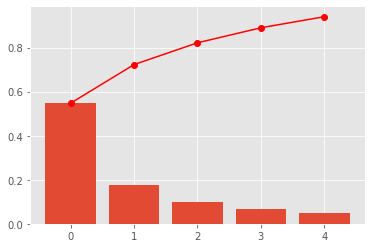

In [26]:
p_accu = accumulate(pca.explained_variance_ratio_)
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

In [27]:
pca = decomposition.PCA(n_components=3)
pca.fit(X_pca_std)
X_pca = pca.transform(X_pca_std)
pca.explained_variance_ratio_

array([0.54761821, 0.17528988, 0.09879897])

## Keras MLP

In [28]:
import keras.backend as K
def r_squared(y_true, y_pred):
    SS_res = K.sum((y_true - y_pred)**2) 
    SS_tot = K.sum((y_true - K.mean(y_true))**2) 
    return (1 - SS_res/SS_tot)

Using TensorFlow backend.


In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(50, input_dim=3, kernel_initializer='normal',activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam',metrics=[r_squared])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_pca, y.values, epochs=100, batch_size=20, validation_split=0.3)

Train on 1021 samples, validate on 439 samples
Epoch 1/100
1021/1021 [==============================] - 2s 2ms/step - loss: 39391720934.4251 - r_squared: -inf - val_loss: 38217902168.6378 - val_r_squared: -7.0810
Epoch 2/100
1021/1021 [==============================] - 0s 216us/step - loss: 39383082917.7355 - r_squared: -inf - val_loss: 38190657885.8861 - val_r_squared: -7.0751
Epoch 3/100
1021/1021 [==============================] - 0s 225us/step - loss: 39296325954.9461 - r_squared: -inf - val_loss: 38002842327.7631 - val_r_squared: -7.0347
Epoch 4/100
1021/1021 [==============================] - 0s 225us/step - loss: 38893494906.8599 - r_squared: -inf - val_loss: 37288761819.8451 - val_r_squared: -6.8813
Epoch 5/100
1021/1021 [==============================] - 0s 225us/step - loss: 37680096152.6974 - r_squared: -inf - val_loss: 35501690450.8064 - val_r_squared: -6.4980
Epoch 6/100
1021/1021 [==============================] - 0s 227us/step - loss: 35106930936.7287 - r_squared: -inf -

Epoch 50/100
1021/1021 [==============================] - 0s 243us/step - loss: 1365387596.9598 - r_squared: -inf - val_loss: 2116497917.2301 - val_r_squared: 0.3311
Epoch 51/100
1021/1021 [==============================] - 0s 215us/step - loss: 1361631764.3643 - r_squared: -inf - val_loss: 2109275434.8610 - val_r_squared: 0.3349
Epoch 52/100
1021/1021 [==============================] - 0s 215us/step - loss: 1357864477.4613 - r_squared: -inf - val_loss: 2121731369.5490 - val_r_squared: 0.3270
Epoch 53/100
1021/1021 [==============================] - 0s 218us/step - loss: 1355120797.9314 - r_squared: -inf - val_loss: 2122213926.9248 - val_r_squared: 0.3264
Epoch 54/100
1021/1021 [==============================] - 0s 220us/step - loss: 1351695256.3213 - r_squared: -inf - val_loss: 2106197711.7449 - val_r_squared: 0.3347
Epoch 55/100
1021/1021 [==============================] - 0s 218us/step - loss: 1351116960.4701 - r_squared: -inf - val_loss: 2116780155.1891 - val_r_squared: 0.3281
Epoc

1021/1021 [==============================] - 0s 229us/step - loss: 1289333842.4917 - r_squared: -inf - val_loss: 2042299131.0433 - val_r_squared: 0.3512
Epoch 100/100
1021/1021 [==============================] - 0s 266us/step - loss: 1301723978.9070 - r_squared: -inf - val_loss: 2088280088.4920 - val_r_squared: 0.3273


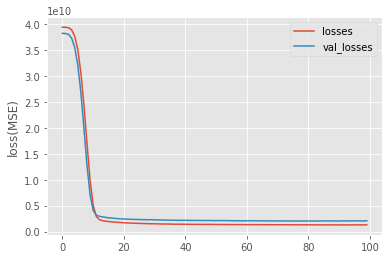

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
losses = history.history.get('loss')
val_losses = history.history.get('val_loss')
x = [i for i in range(len(losses))]
plt.plot(x, losses, label='losses')
plt.plot(x, val_losses, label='val_losses')
plt.ylabel('loss(MSE)')
plt.legend()
plt.show()

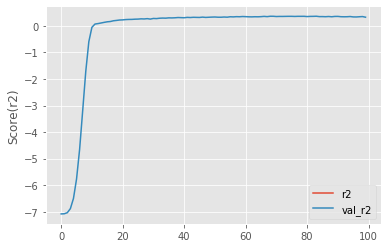

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
r2 = history.history.get('r_squared')
val_r2 = history.history.get('val_r_squared')
x = [i for i in range(len(r2))]
plt.plot(x, r2, label='r2')
plt.plot(x, val_r2, label='val_r2')
plt.ylabel('Score(r2)')
plt.legend()
plt.show()

In [34]:
model = Sequential()

model.add(Dense(50, input_dim=7, kernel_initializer='normal',activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam',metrics=[r_squared])

In [35]:
history = model.fit(X_train_std, y_train, epochs=100, batch_size=20, validation_split=0.3)

Train on 715 samples, validate on 307 samples
Epoch 1/100
715/715 [==============================] - 2s 2ms/step - loss: 38288959874.6853 - r_squared: -6.9303 - val_loss: 40675394456.5993 - val_r_squared: -8.4194
Epoch 2/100
715/715 [==============================] - 0s 217us/step - loss: 38287320500.8112 - r_squared: -6.8553 - val_loss: 40670414807.9739 - val_r_squared: -8.4181
Epoch 3/100
715/715 [==============================] - 0s 219us/step - loss: 38271265269.2587 - r_squared: -7.0576 - val_loss: 40632573778.5537 - val_r_squared: -8.4088
Epoch 4/100
715/715 [==============================] - 0s 223us/step - loss: 38191245956.4755 - r_squared: -6.9440 - val_loss: 40475755870.2280 - val_r_squared: -8.3708
Epoch 5/100
715/715 [==============================] - 0s 224us/step - loss: 37934342315.8601 - r_squared: -6.9473 - val_loss: 40044418418.2410 - val_r_squared: -8.2671
Epoch 6/100
715/715 [==============================] - 0s 225us/step - loss: 37315361956.6993 - r_squared: -6.7

715/715 [==============================] - 0s 228us/step - loss: 2388462760.2797 - r_squared: 0.5243 - val_loss: 1556754517.6808 - val_r_squared: 0.6194
Epoch 50/100
715/715 [==============================] - 0s 218us/step - loss: 2345224429.2028 - r_squared: 0.3624 - val_loss: 1559413279.4788 - val_r_squared: 0.6265
Epoch 51/100
715/715 [==============================] - 0s 221us/step - loss: 2297219319.9441 - r_squared: 0.5582 - val_loss: 1535540806.2541 - val_r_squared: 0.6347
Epoch 52/100
715/715 [==============================] - 0s 221us/step - loss: 2265149478.4895 - r_squared: 0.5445 - val_loss: 1533759412.7427 - val_r_squared: 0.6417
Epoch 53/100
715/715 [==============================] - 0s 222us/step - loss: 2227027256.3916 - r_squared: 0.5469 - val_loss: 1517073391.5309 - val_r_squared: 0.6474
Epoch 54/100
715/715 [==============================] - 0s 220us/step - loss: 2198298161.6783 - r_squared: 0.5083 - val_loss: 1492868250.8925 - val_r_squared: 0.6545
Epoch 55/100
715/

715/715 [==============================] - 0s 246us/step - loss: 1739103669.7063 - r_squared: 0.6333 - val_loss: 1461445335.7655 - val_r_squared: 0.7239
Epoch 99/100
715/715 [==============================] - 0s 246us/step - loss: 1735101931.8601 - r_squared: 0.6316 - val_loss: 1446967312.2606 - val_r_squared: 0.7223
Epoch 100/100
715/715 [==============================] - 0s 230us/step - loss: 1736341657.5105 - r_squared: 0.6178 - val_loss: 1464679126.5147 - val_r_squared: 0.7242


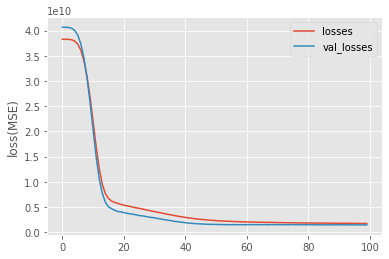

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
losses = history.history.get('loss')
val_losses = history.history.get('val_loss')
x = [i for i in range(len(losses))]
plt.plot(x, losses, label='losses')
plt.plot(x, val_losses, label='val_losses')
plt.ylabel('loss(MSE)')
plt.legend()
plt.show()

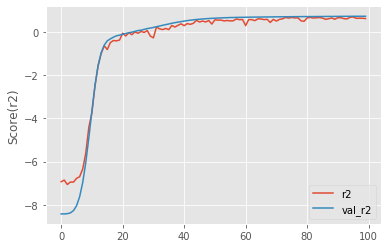

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
r2 = history.history.get('r_squared')
val_r2 = history.history.get('val_r_squared')
x = [i for i in range(len(r2))]
plt.plot(x, r2, label='r2')
plt.plot(x, val_r2, label='val_r2')
plt.ylabel('Score(r2)')
plt.legend()
plt.show()